In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [122]:
df = pd.read_csv('mtn_customer_churn.csv')
df.head()

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


In [123]:
df.drop(columns=['Customer ID', 'Reasons for Churn', 'Full Name'], axis =1, inplace=True)

In [124]:
df.shape

(974, 14)

In [125]:
df.describe()

,Age,Satisfaction Rate,Customer Tenure in months,Unit Price,Number of Times Purchased,Total Revenue,Data Usage
count,974.000000,974.000000,974.000000,974.000000,974.000000,9.740000e+02,974.000000
mean,48.043121,2.947639,31.422998,19196.663244,10.564682,2.046696e+05,99.304764
std,17.764307,1.384219,17.191256,25586.726985,5.709427,3.247855e+05,57.739511
min,16.000000,1.000000,1.000000,350.000000,1.000000,3.500000e+02,0.820000
25%,32.000000,2.000000,17.000000,5500.000000,5.000000,3.300000e+04,47.637500
50%,49.000000,3.000000,31.000000,14500.000000,11.000000,1.080000e+05,103.330000
75%,63.750000,4.000000,47.000000,24000.000000,15.000000,2.610000e+05,149.697500
max,80.000000,5.000000,60.000000,150000.000000,20.000000,3.000000e+06,200.000000


In [126]:
df.isna().sum()

Date of Purchase             0
Age                          0
State                        0
MTN Device                   0
Gender                       0
Satisfaction Rate            0
Customer Review              0
Customer Tenure in months    0
Subscription Plan            0
Unit Price                   0
Number of Times Purchased    0
Total Revenue                0
Data Usage                   0
Customer Churn Status        0
dtype: int64

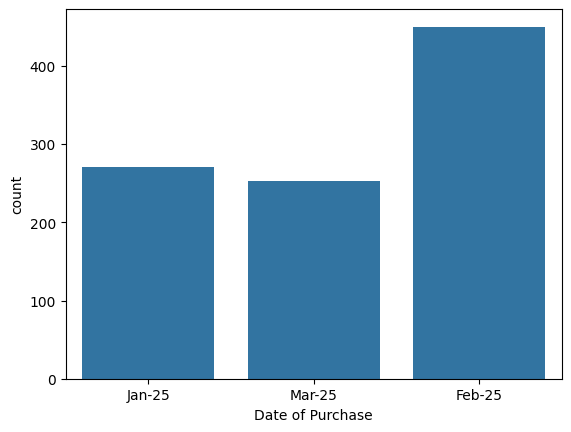

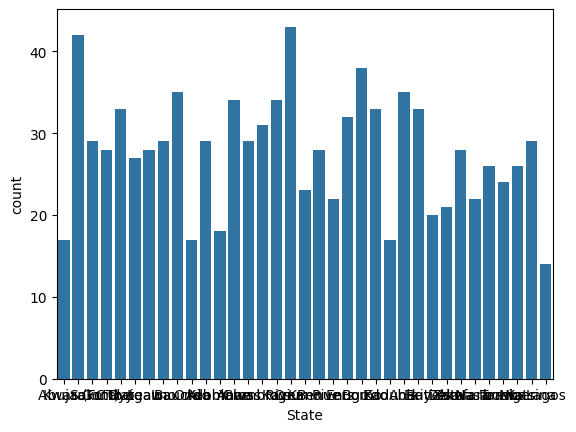

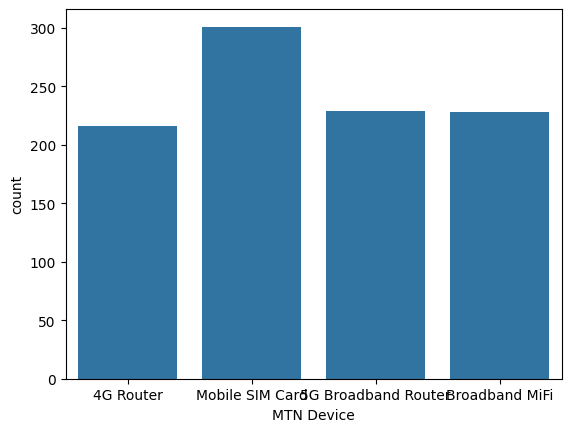

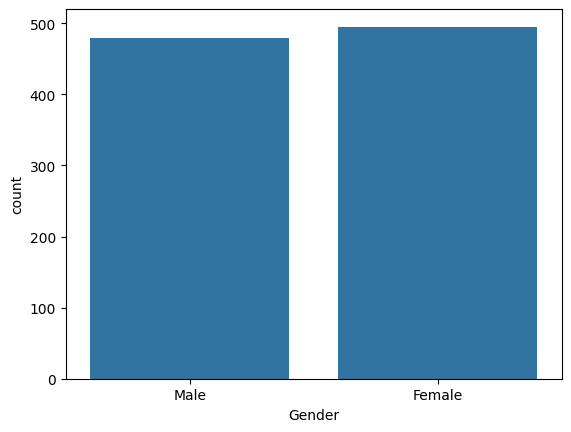

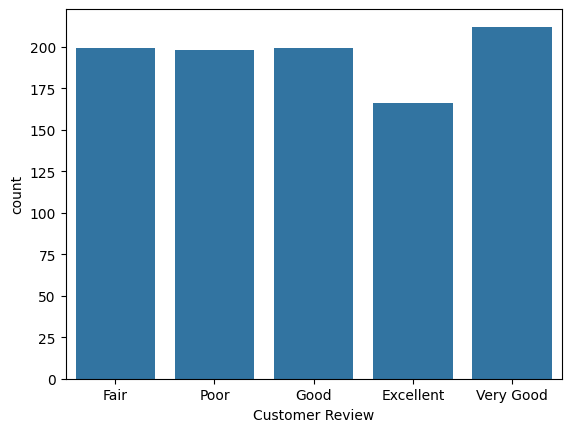

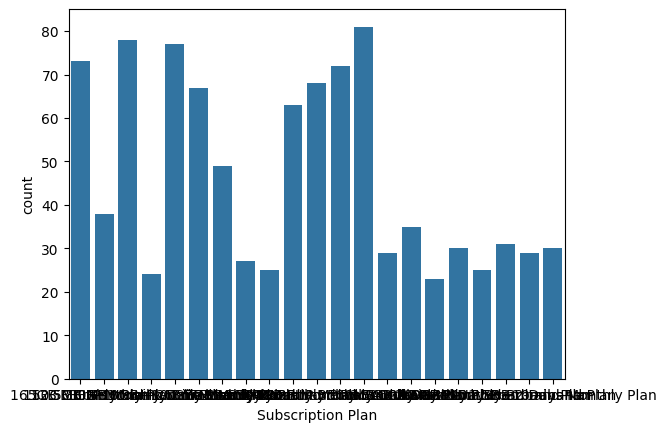

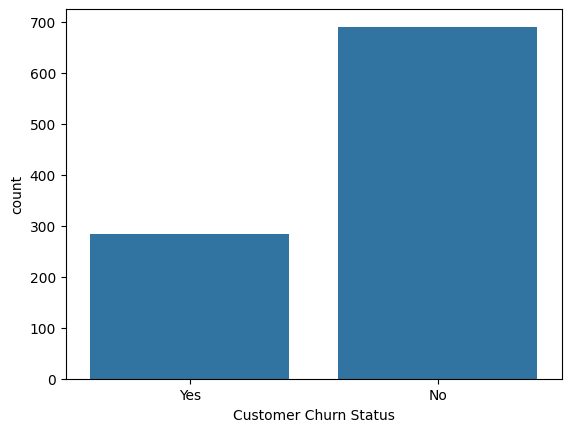

In [127]:
cat__cols = df.select_dtypes(include=("object")).columns
for col in cat__cols:
    sns.countplot(x=col, data=df)
    plt.show()

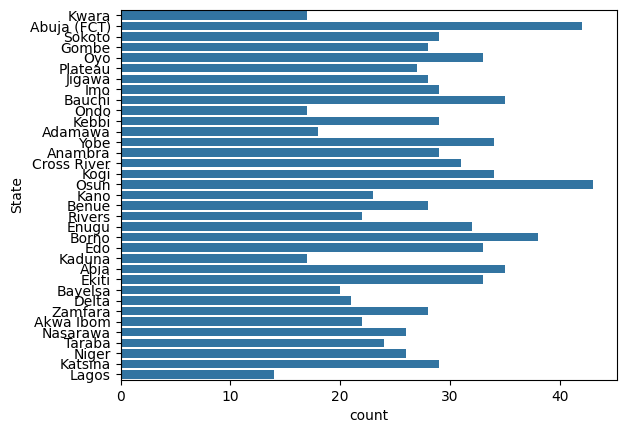

In [128]:
sns.countplot(df.State)
plt.show()

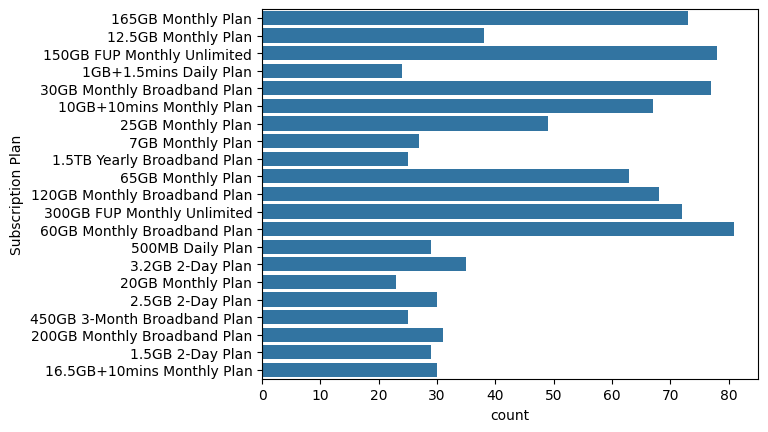

In [129]:
sns.countplot(df['Subscription Plan'])
plt.show()

In [130]:
yes_df = df[df['Customer Churn Status'] == 'Yes']
no_df = df[df['Customer Churn Status'] == 'No']

In [131]:
count_no, count_yes = df['Customer Churn Status'].value_counts()
print("No churn: ", count_no)
print("Yes churn: ", count_yes)

No churn:  690
Yes churn:  284


In [132]:
df_yes_over = yes_df.sample(count_no, replace=True)
df_balanced = pd.concat([no_df, df_yes_over], axis=0)
df_balanced.shape

(1380, 14)

In [133]:
df_balanced.isna().sum()

Date of Purchase             0
Age                          0
State                        0
MTN Device                   0
Gender                       0
Satisfaction Rate            0
Customer Review              0
Customer Tenure in months    0
Subscription Plan            0
Unit Price                   0
Number of Times Purchased    0
Total Revenue                0
Data Usage                   0
Customer Churn Status        0
dtype: int64

In [134]:
oh =  LabelEncoder()
cat_cols = df_balanced.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_balanced[col] = oh.fit_transform(df_balanced[[col]])

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataC

In [135]:
st = StandardScaler()
x = df_balanced.drop('Customer Churn Status', axis=1)
y = df_balanced['Customer Churn Status']
x_scaled = st.fit_transform(x)

In [168]:
x.head()

,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage
2,2,21,31,1,1,1,3,60,5,20000,8,160000,9.64
3,2,21,31,3,1,1,3,60,8,500,8,4000,197.05
4,2,21,31,2,1,1,3,60,15,9000,15,135000,76.34
5,2,36,14,0,0,1,3,14,2,4500,9,40500,92.72
6,1,57,28,0,1,3,2,53,12,9000,16,144000,42.92


In [136]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [137]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500)
mlp.fit(x_train, y_train)

,hidden_layer_sizes,"(128, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,None


In [138]:
rnd = RandomForestClassifier()
rnd.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [139]:
mlp.score(x_test, y_test).__round__(2)

0.82

In [140]:
rnd.score(x_test, y_test).__round__(2)

0.91

In [165]:
from xgboost import XGBClassifier

xg = XGBClassifier(
    objective='binary:logistic',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.9,
)
xg.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [166]:
xg.score(x_test, y_test).__round__(2)

0.93

In [169]:
import joblib
joblib.dump(xg, 'xg_churn_model.pkl')
joblib.dump(st, 'scaler.pkl')
joblib.dump(oh, 'label_encoder.pkl')

['label_encoder.pkl']